# Import libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
## Upload file

# Explore data

#### Meta data

1. danceability: Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity.
2. valence: Describes the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
3. energy: Represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.
4. tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece, and derives directly from the average beat duration.
5. loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks.
6. speechiness: This detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.
7. instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”.
8. liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.
9. acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic.
10. key: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.
11. mode: Indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
12. duration: The duration of the track in milliseconds and in minutes.
13. time_signature: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
14. artist_name
15. track_name
16. popularity: The popularity of the track. The value will be between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Artist and album popularity is derived mathematically from track popularity. Note that the popularity value may lag actual popularity by a few days: the value is not updated in real time.
17. class: Ranging from 0 to 10, there are 11 classes and the labels are as follows:
* "0" = "Acoustic/Folk", '1' = "Alt_music", '2' = "Blues", '3' = "Bollywood", '4' = "Country", '5' = "HipHop", '6' = "Indie_Alt", '7' = "Instrumental", '8' = "Metal", '9' = "Pop", '10' = "Rock"

#### Load dataset

In [ ]:
df = pd.read_csv("/content/music_data.csv")
df

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


#### Basic information of data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

# Data cleaning

#### Convert the names of columns to lower case and replace white spaces with "-"

In [ ]:
print("Original column names = ", df.columns)

df.columns= df.columns.str.replace(" ","_").str.lower()
print("Column names after conversion = ", df.columns)


Original column names =  Index(['Artist Name', 'Track Name', 'Popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in min/ms', 'time_signature', 'Class'],
      dtype='object')
Column names after conversion =  Index(['artist_name', 'track_name', 'popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in_min/ms', 'time_signature', 'class'],
      dtype='object')


#### Convert "duration_in_min/ms" column values from minutes to milliseconds

In [ ]:
# Display the values that are in minutes (after exploring the values in duration_in_min/ms column, I found the values that are in minutes have value less than 30)
df.loc[(df['duration_in_min/ms'] < 30)]['duration_in_min/ms']

7        3.105783
10       4.330450
13       4.440250
25       4.015633
34       3.503783
           ...   
17952    5.407783
17959    3.686017
17974    3.408667
17986    4.392883
17988    3.787783
Name: duration_in_min/ms, Length: 2580, dtype: float64

In [ ]:
condition = df['duration_in_min/ms'] < 30
condition.value_counts()

False    15416
True      2580
Name: duration_in_min/ms, dtype: int64

In [ ]:
condition = df['duration_in_min/ms'] < 30

# If the value in duration_in_min/ms column is less than 30, then multiply the value with 60,000
df.loc[condition,'duration_in_min/ms'] = df.loc[condition,'duration_in_min/ms']*60000

#### Rename "duration_in_min/ms" column name to "duration_in_ms"

In [ ]:
df.rename(columns={"duration_in_min/ms": "duration_in_ms"}, inplace = True)
df.head(10)[['duration_in_ms']]

,duration_in_ms
0,234596.00000
1,251733.00000
2,109667.00000
3,173968.00000
4,229960.00000
5,208133.00000
6,329387.00000
7,186346.99998
8,237867.00000
9,164093.00000


#### Find duplicate rows that have same values across all columns except for column "class"

In [ ]:
duplicateRows = df[df.duplicated(subset = df.columns.difference(['class']))]
duplicateRows

,artist_name,track_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in_ms,time_signature,class
350,The Cult,She Sells Sanctuary,69.0,0.550,0.765,7.0,-8.684,1,0.0287,0.000005,0.873000,0.132,0.419,139.460,252533.0,4,6
591,Foreign Air,Monsters,50.0,0.552,0.673,9.0,-4.900,0,0.0298,0.005530,NaN,0.114,0.174,89.993,224053.0,4,9
1073,Carla Geneve,Greg's Discount Chemist,37.0,0.696,0.598,7.0,-5.413,1,0.0301,0.014600,0.000517,0.104,0.515,132.941,209661.0,4,1
1104,The Futureheads,The Beginning Of The Twist,43.0,0.420,0.988,5.0,-2.622,1,0.1570,0.001640,NaN,0.286,0.353,155.993,216040.0,4,1
1141,Brittany Howard,Stay High,54.0,0.598,0.853,9.0,-5.373,1,0.0545,0.132000,0.002970,0.132,0.312,121.988,191396.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,The Marcus King Band,Boone,38.0,0.357,0.757,7.0,-7.487,0,0.0410,0.000843,0.004350,0.262,0.488,169.981,329544.0,4,2
17953,Or Edry,◊ô◊û◊ô ◊®◊ê◊©◊ô◊™ ◊î◊ß◊ô◊•,28.0,0.612,0.676,7.0,-6.977,1,0.0267,0.272000,0.008210,0.237,0.557,130.052,230100.0,4,6
17960,The Flaming Lips,The Yeah Yeah Yeah Song,39.0,0.636,0.887,4.0,-4.354,1,0.0475,0.002570,0.000052,0.293,0.350,107.984,232520.0,4,6
17982,Lucia & The Best Boys,Blueheart,29.0,0.348,0.726,NaN,-4.730,1,0.0449,0.000363,0.000142,0.383,0.661,182.587,169164.0,4,6


#### Before deleting duplicating rows from the dataset
For example, let's check the duplicate rows in the dataset based on "track_name" column value "Monsters". We have 6 rows with value "Monsters" in the "track_name" column.

In [ ]:
df[df['track_name']=="Monsters"]

,artist_name,track_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in_ms,time_signature,class
152,Foreign Air,Monsters,50.0,0.552,0.673,9.0,-4.900,0,0.0298,0.00553,NaN,0.114,0.174,89.993,224053.0,4,6
591,Foreign Air,Monsters,50.0,0.552,0.673,9.0,-4.900,0,0.0298,0.00553,NaN,0.114,0.174,89.993,224053.0,4,9
3317,Foreign Air,Monsters,50.0,0.552,0.673,9.0,-4.900,0,0.0298,0.00553,NaN,0.114,0.174,89.993,224053.0,4,10
11284,Dream State,Monsters,47.0,0.470,0.862,6.0,-5.494,0,0.1120,0.00504,NaN,0.059,0.473,162.226,222836.0,4,10
14012,Dream State,Monsters,47.0,0.470,0.862,6.0,-5.494,0,0.1120,0.00504,NaN,0.059,0.473,162.226,222836.0,4,8
14931,Matchbook Romance,Monsters,59.0,0.362,0.945,10.0,-2.651,0,0.0575,0.00131,0.000025,0.154,0.487,114.797,243747.0,4,10


#### Remove duplicate rows from the dataset

In [ ]:
print("Shape of dataset before removing duplicate rows =", df.shape)

df.drop_duplicates(subset = df.columns.difference(['class']), inplace = True, ignore_index = True)
print("Shape of dataset after removing duplicate rows =", df.shape)

df

Shape of dataset before removing duplicate rows = (17996, 17)
Shape of dataset after removing duplicate rows = (16319, 17)


,artist_name,track_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in_ms,time_signature,class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16314,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
16315,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
16316,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
16317,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


#### After deleting duplicate rows
For example, let's check the rows in the dataset based on "track_name" column value "Monsters". We have only 3 rows with value "Monsters" in "track_name" column.

In [ ]:
df[df['track_name']=="Monsters"]

,artist_name,track_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in_ms,time_signature,class
152,Foreign Air,Monsters,50.0,0.552,0.673,9.0,-4.900,0,0.0298,0.00553,NaN,0.114,0.174,89.993,224053.0,4,6
10641,Dream State,Monsters,47.0,0.470,0.862,6.0,-5.494,0,0.1120,0.00504,NaN,0.059,0.473,162.226,222836.0,4,10
13759,Matchbook Romance,Monsters,59.0,0.362,0.945,10.0,-2.651,0,0.0575,0.00131,0.000025,0.154,0.487,114.797,243747.0,4,10


# Analyze Data

#### Check null or NaN valules

In [ ]:
# nan_col = df.columns[df.isnull().any()]
# for i in nan_col:
#   if df[i].isnull().sum() == 0:
#     print("No null values in columns")
#   else:
#     print(i, df[i].isnull().sum())
nan_col = df.columns[df.isnull().any()]
for i in nan_col:
    print(i, df[i].isnull().sum())

popularity 397
key 1834
instrumentalness 4089


#### Distribution of numerical variables

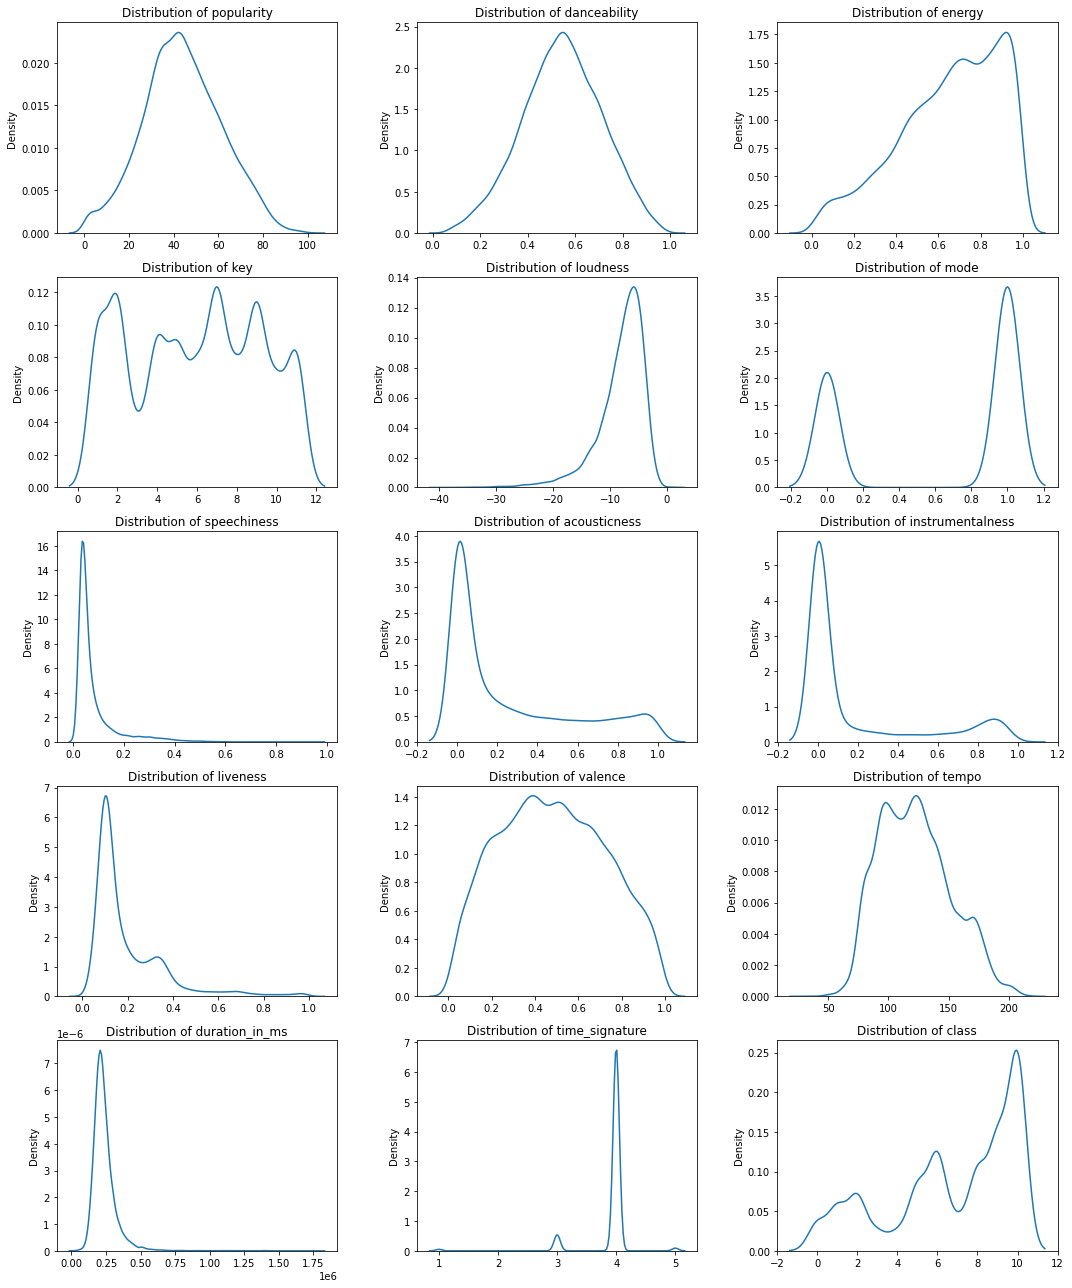

In [ ]:
df_cont = df.select_dtypes([int,float]) # store all integer or float columns in df_cont variable

fig = plt.figure(figsize=(15, 18)) # sets the size of the plot with width as 15 and height as 18
for i,columns in enumerate(df_cont.columns, 1):
    ax = plt.subplot(5,3,i) # creates 3 subplots in one single row
    sns.kdeplot(x=df_cont[columns]) # creates kde plots for each feature in df_cont dataset
    ax.set_xlabel(None) # removes the labels on x-axis
    ax.set_title(f'Distribution of {columns}') # adds a title to each subplot
    plt.tight_layout(w_pad=3) # adds padding between the subplots
plt.show() # displays the plots

#### Calculate skew in numerical variables

In [ ]:
df_cont = df.select_dtypes([int,float]) # store all integer or float columns in df_cont variable

for i in df_cont.columns:
  print(f'Skewness in {i} =',df_cont[i].skew())

Skewness in popularity = 0.08199201878144098
Skewness in danceability = -0.09377729007489485
Skewness in energy = -0.6090760159078138
Skewness in key = -0.047770986424471945
Skewness in loudness = -1.7248754408861746
Skewness in mode = -0.5634728223350667
Skewness in speechiness = 3.046775087444554
Skewness in acousticness = 1.0143193030362685
Skewness in instrumentalness = 1.5134516038529153
Skewness in liveness = 2.209049389108646
Skewness in valence = 0.100076586962193
Skewness in tempo = 0.3915548886941918
Skewness in duration_in_ms = 4.075269752271942
Skewness in time_signature = -4.039737615335105
Skewness in class = -0.6951790138843518


#### Check for outliers in numerical variables

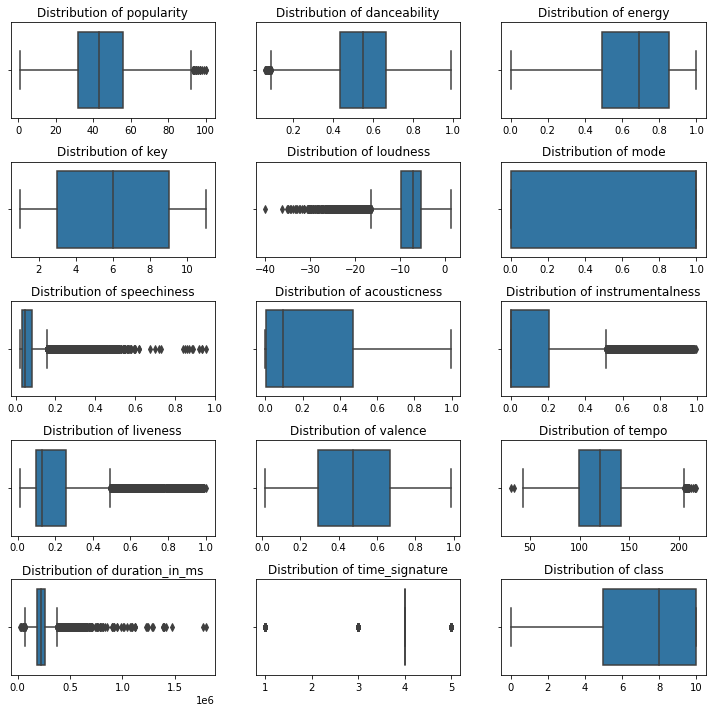

In [ ]:
df_cont = df.select_dtypes([int,float]) # store all integer or float columns in df_cont variable

fig = plt.figure(figsize=(10, 10)) # sets the size of the plot with width as 10 and height as 10
for i,columns in enumerate(df_cont.columns, 1):
    ax = plt.subplot(5,3,i) # creates 3 subplots in one single row
    sns.boxplot(data = df_cont, x=df_cont[columns]) # creates box plots for each feature in df_cont dataset
    ax.set_xlabel(None) # removes the labels on x-axis
    ax.set_title(f'Distribution of {columns}') # adds a title to each subplot
    plt.tight_layout(w_pad=3) # adds padding between the subplots
plt.show() # displays the plots

#### Correlation between numerical variables

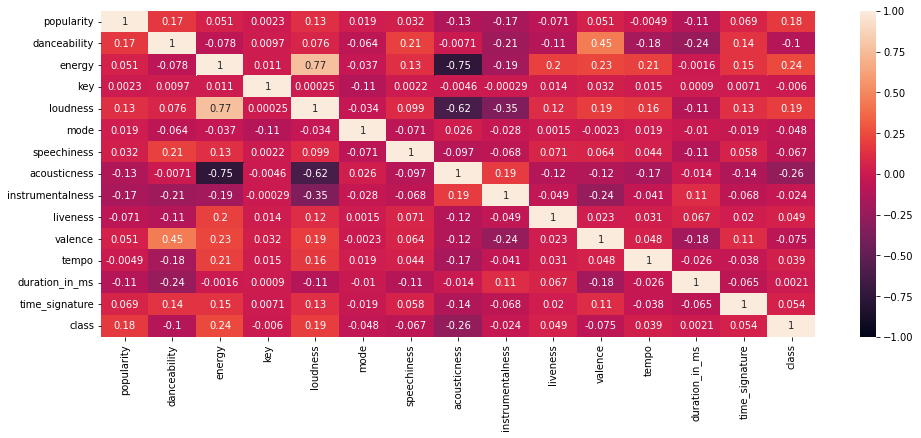

In [ ]:
df_cont = df.select_dtypes([int,float]) # store all integer or float columns in df_cont variable

plt.figure(figsize=(16, 6)) # set the output figure size
sns.heatmap(data = df_cont.corr(), vmin = -1, vmax = 1, annot = True)

#### Distribution of target variable

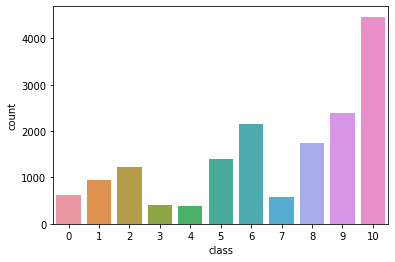

In [ ]:
sns.countplot(data = df, x= df["class"])

# Prepare data (Feature Engineering)

#### Imputing null or NaN values

In [ ]:
## Imputing null values in "popularity" and "instrumentalness" columns with the median value of respective columns
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values = np.nan, strategy = 'median')
df[['popularity','instrumentalness']] = imp.fit_transform(df[['popularity','instrumentalness']])

In [ ]:
## Imputing null values in "key" column with a constant value of -1
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value = -1)
df[['key']]=imp.fit_transform(df[['key']])

#### After imputating null or NaN values, check the count of NaN values

In [ ]:
df.isnull().sum()

artist_name         0
track_name          0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_in_ms      0
time_signature      0
class               0
dtype: int64

#### Remove highly correlated features

In [ ]:
df.drop(columns=["energy"], inplace = True)
df # print dataset after removing energy column

,artist_name,track_name,popularity,danceability,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in_ms,time_signature,class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,1.0,-4.964,1,0.0485,0.017100,0.003910,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,10.0,-6.528,0,0.0555,0.021200,0.003910,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16314,Green-House,Find Home,35.0,0.166,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
16315,Micatone,All Gone,27.0,0.638,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
16316,Smash Hit Combo,Peine perdue,34.0,0.558,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
16317,Beherit,Salomon's Gate,29.0,0.215,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


### Apply transformations to minimize skewness

##### List of skewed columns
1. duration_in_ms
2. loudness,
2. speechiness,
3. acousticness,
4. instrumentalness,
5. liveness,
6. tempo,

In [ ]:
df["duration_in_ms_trans"] = np.sqrt(df["duration_in_ms"]) # square root transform
df["loudness_trans"] = np.cbrt(df["loudness"]) # cube root transform
df["speechiness_trans"] = np.reciprocal(df["speechiness"]) # reciprocal transform
df["acousticness_trans"] = np.cbrt(df["acousticness"]) # cube root transform
df["instrumentalness_trans"] = np.log(df["instrumentalness"]) # log transform
df["liveness_trans"] = np.log(df["liveness"]) # log transform
df["tempo_trans"] = np.cbrt(df["tempo"]) # cube root transform

#### Dataset after adding transformed columns

In [ ]:
df

,artist_name,track_name,popularity,danceability,key,loudness,mode,speechiness,acousticness,instrumentalness,...,duration_in_ms,time_signature,class,duration_in_ms_trans,loudness_trans,speechiness_trans,acousticness_trans,instrumentalness_trans,liveness_trans,tempo_trans
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,1.0,-4.964,1,0.0485,0.017100,0.003910,...,234596.0,4,5,484.351112,-1.705862,20.618557,0.257631,-5.544218,-2.466281,5.118134
1,Boston,Hitch a Ride,54.0,0.382,3.0,-7.230,1,0.0406,0.001100,0.004010,...,251733.0,4,10,501.730007,-1.933657,24.630542,0.103228,-5.518964,-2.292635,4.883353
2,The Raincoats,No Side to Fall In,35.0,0.434,6.0,-8.334,1,0.0525,0.486000,0.000196,...,109667.0,4,6,331.160082,-2.027455,19.047619,0.786222,-8.537396,-0.931404,5.285769
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,10.0,-6.528,0,0.0555,0.021200,0.003910,...,173968.0,4,5,417.094713,-1.868931,18.018018,0.276766,-5.544218,-2.103734,4.747947
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,2.0,-4.279,1,0.2160,0.000169,0.016100,...,229960.0,4,10,479.541448,-1.623482,4.629630,0.055288,-4.128936,-1.760261,5.838859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16314,Green-House,Find Home,35.0,0.166,7.0,-17.100,0,0.0413,0.993000,0.824000,...,193450.0,3,6,439.829512,-2.576313,24.213075,0.997661,-0.193585,-2.318714,5.556843
16315,Micatone,All Gone,27.0,0.638,11.0,-10.174,0,0.0329,0.858000,0.000016,...,257067.0,4,2,507.017751,-2.166859,30.395137,0.950231,-11.036691,-2.652143,4.179645
16316,Smash Hit Combo,Peine perdue,34.0,0.558,4.0,-4.683,0,0.0712,0.000030,0.000136,...,216222.0,4,8,464.996774,-1.673047,14.044944,0.030968,-8.902856,-0.406466,4.717694
16317,Beherit,Salomon's Gate,29.0,0.215,6.0,-12.757,0,0.1340,0.001290,0.916000,...,219693.0,4,8,468.714199,-2.336592,7.462687,0.108859,-0.087739,-1.362578,5.083440


#### Remove original skewed columns

In [ ]:
df.drop(columns = ['duration_in_ms','loudness','speechiness','acousticness','instrumentalness','liveness','tempo'], inplace = True)

#### Dataset after removing original skewed columns

In [ ]:
df.head() # prints first 5 rows of the dataset

,artist_name,track_name,popularity,danceability,key,mode,valence,time_signature,class,duration_in_ms_trans,loudness_trans,speechiness_trans,acousticness_trans,instrumentalness_trans,liveness_trans,tempo_trans
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,1.0,1,0.8990,4,5,484.351112,-1.705862,20.618557,0.257631,-5.544218,-2.466281,5.118134
1,Boston,Hitch a Ride,54.0,0.382,3.0,1,0.5690,4,10,501.730007,-1.933657,24.630542,0.103228,-5.518964,-2.292635,4.883353
2,The Raincoats,No Side to Fall In,35.0,0.434,6.0,1,0.7870,4,6,331.160082,-2.027455,19.047619,0.786222,-8.537396,-0.931404,5.285769
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,10.0,0,0.5690,4,5,417.094713,-1.868931,18.018018,0.276766,-5.544218,-2.103734,4.747947
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,2.0,1,0.0918,4,10,479.541448,-1.623482,4.629630,0.055288,-4.128936,-1.760261,5.838859


#### Treat Outliers

Check for outliers after minimizing skewness

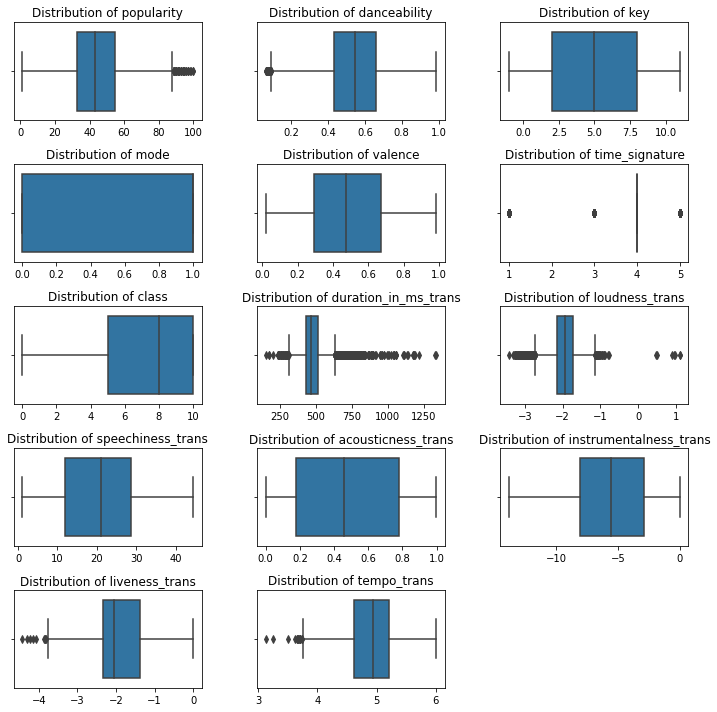

In [ ]:
df_cont = df.select_dtypes([int,float]) # store all integer or float columns in df_cont variable

fig = plt.figure(figsize=(10, 10)) # sets the size of the plot with width as 10 and height as 10
for i,columns in enumerate(df_cont.columns, 1):
    ax = plt.subplot(5,3,i) # creates 3 subplots in one single row
    sns.boxplot(data = df_cont, x=df_cont[columns]) # creates box plots for each feature in df_cont dataset
    ax.set_xlabel(None) # removes the labels on x-axis
    ax.set_title(f'Distribution of {columns}') # adds a title to each subplot
    plt.tight_layout(w_pad=3) # adds padding between the subplots
plt.show() # displays the plots

#### Label Encoding

#### Convert string columns into numerical

In [ ]:
from sklearn.preprocessing import LabelEncoder
columns = ["artist_name","track_name"]
le = LabelEncoder()
for col in columns:
  df[col] = le.fit_transform(df[col])

In [ ]:
df[["artist_name","track_name"]] # print artist_name & track_name columns after conversion

,artist_name,track_name
0,1182,11406
1,1092,4988
2,7899,8144
3,1987,6753
4,6283,8167
...,...,...
16314,3042,3796
16315,5122,476
16316,7032,8769
16317,797,9743


In [ ]:
df

,artist_name,track_name,popularity,danceability,key,mode,valence,time_signature,class,duration_in_ms_trans,loudness_trans,speechiness_trans,acousticness_trans,instrumentalness_trans,liveness_trans,tempo_trans
0,1182,11406,60.0,0.854,1.0,1,0.8990,4,5,484.351112,-1.705862,20.618557,0.257631,-5.544218,-2.466281,5.118134
1,1092,4988,54.0,0.382,3.0,1,0.5690,4,10,501.730007,-1.933657,24.630542,0.103228,-5.518964,-2.292635,4.883353
2,7899,8144,35.0,0.434,6.0,1,0.7870,4,6,331.160082,-2.027455,19.047619,0.786222,-8.537396,-0.931404,5.285769
3,1987,6753,66.0,0.853,10.0,0,0.5690,4,5,417.094713,-1.868931,18.018018,0.276766,-5.544218,-2.103734,4.747947
4,6283,8167,53.0,0.167,2.0,1,0.0918,4,10,479.541448,-1.623482,4.629630,0.055288,-4.128936,-1.760261,5.838859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16314,3042,3796,35.0,0.166,7.0,0,0.1770,3,6,439.829512,-2.576313,24.213075,0.997661,-0.193585,-2.318714,5.556843
16315,5122,476,27.0,0.638,11.0,0,0.3350,4,2,507.017751,-2.166859,30.395137,0.950231,-11.036691,-2.652143,4.179645
16316,7032,8769,34.0,0.558,4.0,0,0.2620,4,8,464.996774,-1.673047,14.044944,0.030968,-8.902856,-0.406466,4.717694
16317,797,9743,29.0,0.215,6.0,0,0.3550,4,8,468.714199,-2.336592,7.462687,0.108859,-0.087739,-1.362578,5.083440


In [ ]:
# df.to_csv("music_cleaned_data.csv",index = False)

In [ ]:
# df = pd.read_csv("music_cleaned_data.csv")
# df

# Train data & build ML model

#### Split the variables

In [ ]:
X = df.drop(columns=["class","track_name","artist_name"], axis=1)
y = df["class"]

#### Train-test-split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=11)

#### Standard scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
normalized_x_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

Xgbclassifier = xgb.XGBClassifier(max_depth=5, objective='multi:softprob', n_estimators=1000,
                        num_classes=11, random_state=5).fit(normalized_x_train, y_train)

normalized_x_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
y_pred = Xgbclassifier.predict(normalized_x_test)

XGBAcc = accuracy_score(y_pred,y_test)
print('XG Boost accuracy is: {:.2f}%'.format(XGBAcc*100))

XG Boost accuracy is: 49.87%


#### Normalizer

In [ ]:
from sklearn.preprocessing import Normalizer
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

normalizer = Normalizer()
normalized_x_train = pd.DataFrame(normalizer.fit_transform(X_train), columns = X_train.columns)

Xgbclassifier = xgb.XGBClassifier(max_depth=5, objective='multi:softprob', n_estimators=1000,
                        num_classes=11, random_state=5).fit(normalized_x_train, y_train)

normalized_x_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
y_pred = Xgbclassifier.predict(normalized_x_test)

XGBAcc = accuracy_score(y_pred,y_test)
print('XG Boost accuracy is: {:.2f}%'.format(XGBAcc*100))

XG Boost accuracy is: 22.02%


#### Scale and train data

#### Scale data using MinmaxScaler and train data using logistic regression algorithm

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

normalized_x_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

LR = LogisticRegression(solver='newton-cg', multi_class = 'multinomial',random_state = 7).fit(normalized_x_train, y_train)

normalized_x_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
y_pred = LR.predict(normalized_x_test)

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

Logistic Regression accuracy is: 45.56%


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LR = LogisticRegression(solver='liblinear').fit(normalized_x_train, y_train)
normalized_x_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
y_pred = LR.predict(normalized_x_test)

LRAcc = accuracy_score(y_pred,y_test) # Calculate accuracy
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

Logistic Regression accuracy is: 45.27%


#### Scale data using StandardScaler and train data using logistic regression algorithm

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

normalized_x_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

LR = LogisticRegression(solver='newton-cg', multi_class = 'multinomial',random_state = 7).fit(normalized_x_train, y_train)
normalized_x_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
y_pred = LR.predict(normalized_x_test)

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

Logistic Regression accuracy is: 45.75%


#### Scale data using MinmaxScaler and train data using random forest classifier (an ensemble tehnique)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

normalized_x_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

RFclassifier = RandomForestClassifier(max_leaf_nodes = 10,random_state = 3).fit(normalized_x_train, y_train)

y_pred = RFclassifier.predict(normalized_x_test)

from sklearn.metrics import accuracy_score
RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

Random Forest accuracy is: 42.03%


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

RFclassifier = RandomForestClassifier(max_leaf_nodes=30).fit(normalized_x_train, y_train)
y_pred = RFclassifier.predict(normalized_x_test)

RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

Random Forest accuracy is: 46.03%


#### Scale data using StandardScaler and train data using Gaussian naive bayes algorithm

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

normalized_x_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
NBclassifier2 = GaussianNB().fit(normalized_x_train, y_train)

y_pred = NBclassifier2.predict(normalized_x_test)

# print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy is: {:.2f}%'.format(NBAcc2*100))

Gaussian Naive Bayes accuracy is: 43.06%


#### Scale data using StandardScaler and train data using decision tree classifier algorithm

Decision Tree accuracy is: 43.69%


[Text(0.2969393004115226, 0.9545454545454546, 'X[9] <= -0.979\ngini = 0.853\nsamples = 10933\nvalue = [444, 626, 810, 276, 264, 903, 1413, 379, 1134, 1643\n3041]'),
 Text(0.14814814814814814, 0.8636363636363636, 'X[4] <= -0.563\ngini = 0.704\nsamples = 2627\nvalue = [7, 148, 58, 1, 4, 59, 293, 0, 923, 103, 1031]'),
 Text(0.0823045267489712, 0.7727272727272727, 'X[8] <= 0.003\ngini = 0.61\nsamples = 1054\nvalue = [5, 40, 6, 0, 2, 16, 87, 0, 572, 16, 310]'),
 Text(0.04938271604938271, 0.6818181818181818, 'X[9] <= -1.223\ngini = 0.529\nsamples = 776\nvalue = [1, 27, 4, 0, 0, 15, 40, 0, 497, 8, 184]'),
 Text(0.03292181069958848, 0.5909090909090909, 'X[6] <= 0.093\ngini = 0.432\nsamples = 579\nvalue = [0, 14, 1, 0, 0, 5, 27, 0, 421, 1, 110]'),
 Text(0.01646090534979424, 0.5, 'gini = 0.56\nsamples = 250\nvalue = [0, 11, 1, 0, 0, 4, 12, 0, 147, 0, 75]'),
 Text(0.04938271604938271, 0.5, 'gini = 0.293\nsamples = 329\nvalue = [0, 3, 0, 0, 0, 1, 15, 0, 274, 1, 35]'),
 Text(0.06584362139917696, 0.

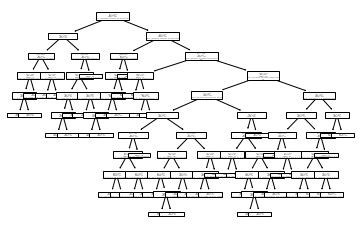

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

# DTclassifier = DecisionTreeClassifier(max_leaf_nodes=20).fit(normalized_x_train, y_train)
DTclassifier = DecisionTreeClassifier(max_depth=100,max_leaf_nodes=50,min_samples_leaf = 100,random_state=0).fit(normalized_x_train, y_train)
y_pred = DTclassifier.predict(normalized_x_test)

DTAcc = accuracy_score(y_pred,y_test) # Calculating accuracy
print('Decision Tree accuracy is: {:.2f}%'.format(DTAcc*100))
tree.plot_tree(DTclassifier)

#### Train data using random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RFclassifier = RandomForestClassifier(max_leaf_nodes=30)
RFclassifier.fit(X_train, y_train)

y_pred = RFclassifier.predict(X_test)

from sklearn.metrics import accuracy_score
RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

Random Forest accuracy is: 45.34%


In [ ]:
from sklearn.ensemble import RandomForestClassifier

RFclassifier = RandomForestClassifier(max_leaf_nodes=30).fit(normalized_x_train, y_train)
y_pred = RFclassifier.predict(normalized_x_test)

from sklearn.metrics import accuracy_score
RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

Random Forest accuracy is: 46.27%


In [ ]:
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

scaler = StandardScaler()
normalized_x_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

Xgbclassifier = xgb.XGBClassifier(max_depth=5, objective='multi:softprob', n_estimators=1000,
                        num_classes=9).fit(normalized_x_train, y_train)

y_pred = Xgbclassifier.predict(normalized_x_test)

XGBAcc = accuracy_score(y_pred,y_test)
print('XG Boost accuracy is: {:.2f}%'.format(XGBAcc*100))


XG Boost accuracy is: 49.87%
